# Bagging & Boosting


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

## Train-test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Bagging

In [6]:
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))

Bagging Accuracy: 1.0


## AdaBoost

In [7]:
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))

AdaBoost Accuracy: 1.0


## Gradient Boosting

In [8]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Accuracy: 1.0


## Evaluation

In [9]:
print("Classification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix (Gradient Boosting):\n", confusion_matrix(y_test, y_pred_gb))

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix (Gradient Boosting):
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## Visualization: Feature Importance

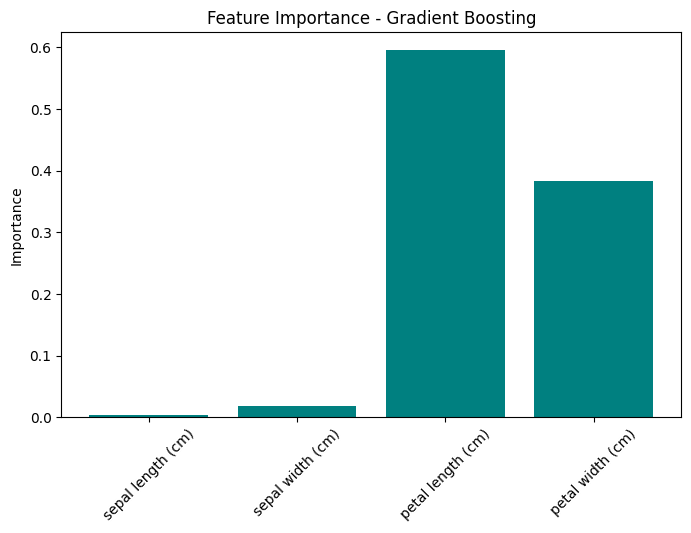

In [10]:
plt.figure(figsize=(8,5))
plt.bar(iris.feature_names, gb.feature_importances_, color="teal")
plt.title("Feature Importance - Gradient Boosting")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()